In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import utils
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
!pip install autokeras
import autokeras as ak
%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

from google.colab import drive
drive.mount('/content/drive')

d_s = pd.read_csv('/content/drive/MyDrive/Учебная/Internship_NMIC/dataset_pht3_send.csv', index_col=0)
d_s_backup = d_s.copy()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.8/584.8 kB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 93.1 MB/s eta 0:00:00
Using TensorFlow backend
Mounted at /content/drive


In [29]:
d_s.iloc[199000]

Раса                                                                         Азиатская
Пол                                                                            Мужской
Возраст                                                                            >70
Статус курения                                                       В настоящее время
ECOG                                                                                 2
Есть опухолевая нагрузка? (симптомная опухоль)                                     нет
Ко-мутации KRAS                                                                     да
Ко-мутации p53.                                                                     да
Ко-мутации STK11                                                                   нет
Ко-мутации KEAP1                                                                   нет
Срок от окончания ХЛТ                                                 от 43 до 60 дней
Молекулярный статус (только для неплоскокле

In [4]:
d_s = d_s.drop(columns=['Поставьте галочку, если уверены на 100%',	'Если 75%',	'Если 50%',	'Альтернатива, если 50% - обязательно',	'Комментарий'], axis=0)

In [5]:
d_s

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов)
id_ответа,,,,,,,,,,,,,,,
1,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб
2,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,нет мутаций,Не исследовался,Результативность лечения,Дурвалумаб
3,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,более 61 дня,нет мутаций,Не исследовался,Результативность лечения,Наблюдение
4,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,до 42 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб
5,Азиатская,Мужской,До 70,В настоящее время,0-1,да,да,да,да,да,от 43 до 60 дней,не исследовались,Не исследовался,Результативность лечения,Дурвалумаб
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248828,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,нет,от 43 до 60 дней,EGFR ex21,Более 1%,сохранение качества жизни,Наблюдение
248829,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,нет,более 61 дня,EGFR ex21,Более 1%,сохранение качества жизни,Наблюдение
248830,Другая,Женский,>70,Курение в прошлом (бросил более 1 года),2,нет,нет,нет,нет,нет,до 42 дней,ALK позитивный,Более 1%,сохранение качества жизни,Алектиниб


In [6]:
for name, values in d_s.items():
  print(name, ":", d_s[name].unique())

Раса : ['Азиатская' 'Европейская' 'Другая']
Пол : [' Мужской' ' Женский']
Возраст : [' До 70' ' >70']
Статус курения : [' В настоящее время'
 ' Курение в прошлом (бросил более 1 месяца до 1 года)'
 ' Курение в прошлом (бросил более 1 года)']
ECOG : [' 0-1' '2']
Есть опухолевая нагрузка? (симптомная опухоль) : [' да' ' нет']
Ко-мутации KRAS : [' да' ' нет']
Ко-мутации p53. : [' да' ' нет']
Ко-мутации STK11 : [' да' ' нет']
Ко-мутации KEAP1 : [' да' ' нет']
Срок от окончания ХЛТ : ['до 42 дней' 'от 43 до 60 дней' 'более 61 дня']
Молекулярный статус (только для неплоскоклеточного рака) : [' нет мутаций' ' не исследовались' ' EGFR редкий вариант' ' EGFR ex19'
 ' EGFR ex21' ' ALK позитивный']
PD-L1 статус : [' Не исследовался' ' Менее 1%' ' Более 1%']
Предпочтение пациента по ответу на терапию : [' Результативность лечения' ' сохранение качества жизни']
Ответ эксперта (Лактионов) : ['Дурвалумаб' 'Наблюдение' 'Осимертиниб' 'Алектиниб']


In [7]:
data_colnames = d_s.columns.tolist()
lst_count = len(data_colnames)
for i in range(lst_count):
  i_elem = data_colnames[i]
  print(f"{i}->{lst_count}: '{i_elem}'")

0->15: 'Раса'
1->15: 'Пол'
2->15: 'Возраст'
3->15: 'Статус курения'
4->15: 'ECOG'
5->15: 'Есть опухолевая нагрузка? (симптомная опухоль)'
6->15: 'Ко-мутации KRAS'
7->15: 'Ко-мутации p53.'
8->15: 'Ко-мутации STK11'
9->15: 'Ко-мутации KEAP1'
10->15: 'Срок от окончания ХЛТ'
11->15: 'Молекулярный статус (только для неплоскоклеточного рака)'
12->15: 'PD-L1 статус'
13->15: 'Предпочтение пациента по ответу на терапию'
14->15: 'Ответ эксперта (Лактионов)'


In [8]:
def getDictionary(data):
  dict={}

  for name in data_colnames:
   index = data_colnames.index(name)
   uniq = data[name].unique()
   if uniq[0]!='0':
     a = np.insert(uniq, 0, '0')

     dict[index] =a
   else:
    dict [index] = data[name].unique()
  return dict

dictionaryDefault = getDictionary(d_s)
print(dictionaryDefault)

{0: array(['0', 'Азиатская', 'Европейская', 'Другая'], dtype=object), 1: array(['0', ' Мужской', ' Женский'], dtype=object), 2: array(['0', ' До 70', ' >70'], dtype=object), 3: array(['0', ' В настоящее время',
       ' Курение в прошлом (бросил более 1 месяца до 1 года)',
       ' Курение в прошлом (бросил более 1 года)'], dtype=object), 4: array(['0', ' 0-1', '2'], dtype=object), 5: array(['0', ' да', ' нет'], dtype=object), 6: array(['0', ' да', ' нет'], dtype=object), 7: array(['0', ' да', ' нет'], dtype=object), 8: array(['0', ' да', ' нет'], dtype=object), 9: array(['0', ' да', ' нет'], dtype=object), 10: array(['0', 'до 42 дней', 'от 43 до 60 дней', 'более 61 дня'],
      dtype=object), 11: array(['0', ' нет мутаций', ' не исследовались', ' EGFR редкий вариант',
       ' EGFR ex19', ' EGFR ex21', ' ALK позитивный'], dtype=object), 12: array(['0', ' Не исследовался', ' Менее 1%', ' Более 1%'], dtype=object), 13: array(['0', ' Результативность лечения', ' сохранение качества жизни

In [9]:
def getArgmaxData(values):
  all_data = []

  for val in values:
    ohe = []

    for i in range(len(val)):
      currentList =  dictionaryDefault[i].tolist()
      currentIndex = currentList.index(val[i])

      a = np.argmax(list(utils.to_categorical(currentIndex, len(currentList)).astype('int')))
      ohe.append(a)
    all_data.append(ohe)

  return all_data

In [10]:

all_data = getArgmaxData(d_s.values)
categorical = pd.DataFrame(all_data,columns=data_colnames)
categorical.head(10)

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию,Ответ эксперта (Лактионов)
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,3,1,1,1,2
3,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1
4,1,1,1,1,1,1,1,1,1,1,2,2,1,1,1
5,1,1,1,1,1,1,1,1,1,1,3,2,1,1,2
6,1,1,1,1,1,1,1,1,1,1,1,3,1,1,2
7,1,1,1,1,1,1,1,1,1,1,2,3,1,1,2
8,1,1,1,1,1,1,1,1,1,1,3,3,1,1,2
9,1,1,1,1,1,1,1,1,1,1,1,4,1,1,3


In [11]:
x_data = categorical.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
x_data.head(5)

,Раса,Пол,Возраст,Статус курения,ECOG,Есть опухолевая нагрузка? (симптомная опухоль),Ко-мутации KRAS,Ко-мутации p53.,Ко-мутации STK11,Ко-мутации KEAP1,Срок от окончания ХЛТ,Молекулярный статус (только для неплоскоклеточного рака),PD-L1 статус,Предпочтение пациента по ответу на терапию
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,2,1,1,1
2,1,1,1,1,1,1,1,1,1,1,3,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,2,1,1
4,1,1,1,1,1,1,1,1,1,1,2,2,1,1


In [12]:
y_data = categorical.iloc[:, [14]]
y_data.head(5)

,Ответ эксперта (Лактионов)
0,1
1,1
2,2
3,1
4,1


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, BatchNormalization

In [14]:
CLASS_COUNT = 10


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size = 0.1,
                                                    shuffle=True,
                                                    random_state=42)

print('Обучающая выборка данных', len(x_train))
print('Обучающая выборка меток', len(y_train))
print()
print('Тестовая выборка данных', len(x_test))
print('Тестовая выборка меток', len(y_test))

Обучающая выборка данных 223948
Обучающая выборка меток 223948

Тестовая выборка данных 24884
Тестовая выборка меток 24884


In [16]:
print(x_train.shape)
print(y_train.shape)

(223948, 14)
(223948, 1)


In [17]:
y_train = utils.to_categorical(y_train, CLASS_COUNT)
y_test = utils.to_categorical(y_test, CLASS_COUNT)

In [18]:
print(y_train.shape)

(223948, 10)


##MODEL 1

In [19]:
model = Sequential()

model.add(Dense(140, input_dim=14, activation='relu', name='Class_2'))
model.add(Dropout(0.3))
model.add(Dense(CLASS_COUNT, activation='softmax', name='Class_4'))
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Class_2 (Dense)             (None, 140)               2100      
                                                                 
 dropout (Dropout)           (None, 140)               0         
                                                                 
 Class_4 (Dense)             (None, 10)                1410      
                                                                 
Total params: 3510 (13.71 KB)
Trainable params: 3510 (13.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
store_learning = model.fit(x_train,
                  y_train,
                  batch_size=100,
                  epochs=20,
                  validation_split=0.2,
                  shuffle=True,
                  verbose=1)

Epoch 1/20
1792/1792 [==============================] - 10s 4ms/step - loss: 0.5142 - accuracy: 0.7970 - val_loss: 0.2898 - val_accuracy: 0.8974
Epoch 2/20
1792/1792 [==============================] - 6s 3ms/step - loss: 0.2522 - accuracy: 0.9070 - val_loss: 0.1501 - val_accuracy: 0.9580
Epoch 3/20
1792/1792 [==============================] - 8s 4ms/step - loss: 0.1526 - accuracy: 0.9506 - val_loss: 0.0826 - val_accuracy: 0.9832
Epoch 4/20
1792/1792 [==============================] - 6s 4ms/step - loss: 0.0968 - accuracy: 0.9710 - val_loss: 0.0506 - val_accuracy: 0.9883
Epoch 5/20
1792/1792 [==============================] - 7s 4ms/step - loss: 0.0645 - accuracy: 0.9821 - val_loss: 0.0257 - val_accuracy: 0.9997
Epoch 6/20
1792/1792 [==============================] - 6s 4ms/step - loss: 0.0466 - accuracy: 0.9877 - val_loss: 0.0223 - val_accuracy: 0.9923
Epoch 7/20
1792/1792 [==============================] - 7s 4ms/step - loss: 0.0355 - accuracy: 0.9907 - val_loss: 0.0127 - val_accuracy

In [21]:
print(store_learning.history)

{'loss': [0.5142340660095215, 0.25218304991722107, 0.15255063772201538, 0.09676172584295273, 0.06449003517627716, 0.04658602923154831, 0.035537853837013245, 0.028181083500385284, 0.024146797135472298, 0.021149655804038048, 0.018039386719465256, 0.0164450965821743, 0.015085900202393532, 0.01336752437055111, 0.01230417937040329, 0.011695570312440395, 0.010625340044498444, 0.009893890470266342, 0.009809428825974464, 0.009302289225161076], 'accuracy': [0.7969613671302795, 0.9069871306419373, 0.9505687952041626, 0.9709920883178711, 0.9820716977119446, 0.987675666809082, 0.9907344579696655, 0.9929503798484802, 0.9937317967414856, 0.9946192502975464, 0.9955011606216431, 0.995836079120636, 0.9962211847305298, 0.9966956377029419, 0.9969133138656616, 0.9970640540122986, 0.9973096251487732, 0.9976780414581299, 0.9976166486740112, 0.9977226853370667], 'val_loss': [0.28980278968811035, 0.150117889046669, 0.08255142718553543, 0.05061652883887291, 0.025722380727529526, 0.022254444658756256, 0.0127256

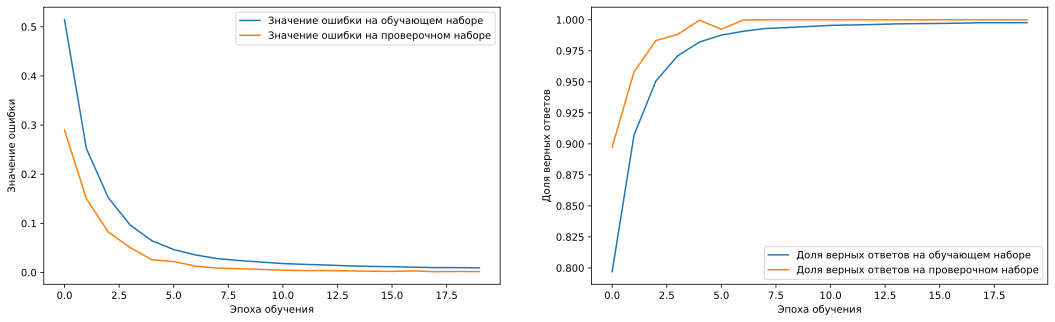

In [22]:
plt.figure(1, figsize=(18, 5))
plt.subplot(1, 2, 1)
plt.plot(store_learning.history['loss'],
         label='Значение ошибки на обучающем наборе')
plt.plot(store_learning.history['val_loss'],
         label='Значение ошибки на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Значение ошибки')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(store_learning.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(store_learning.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()



In [23]:
scores = model.evaluate(x_test,
                        y_test,
                        verbose=1
                        )

778/778 [==============================] - 2s 2ms/step - loss: 0.0017 - accuracy: 1.0000


In [24]:
print(type(scores))
print(scores)

<class 'list'>
[0.0017487419536337256, 1.0]


In [25]:
print('Процент верных ответов на тестовых данных:', round(scores[1],2) * 100, '%')

Процент верных ответов на тестовых данных: 100.0 %


In [26]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
print("Первые несколько предсказаний:")
for i in range(5):
    print(f"Предсказанная метка: {predicted_classes[i]}, Реальная метка: {np.argmax(y_test[i])}")


778/778 [==============================] - 2s 2ms/step
Первые несколько предсказаний:
Предсказанная метка: 3, Реальная метка: 3
Предсказанная метка: 1, Реальная метка: 1
Предсказанная метка: 2, Реальная метка: 2
Предсказанная метка: 2, Реальная метка: 2
Предсказанная метка: 2, Реальная метка: 2


In [27]:
# Предсказываем результаты на тестовых данных
predictions = model.predict(x_test)

# Преобразуем предсказания из one-hot encoded в числовые метки
predicted_classes = np.argmax(predictions, axis=1)

# Преобразуем реальные метки из one-hot encoded в числовые метки
true_classes = np.argmax(y_test, axis=1)

# Выводим первые несколько предсказаний
print("Первые несколько предсказаний:")
for i in range(5):
    # Используем словарь для получения описательной метки
    predicted_label = dictionaryDefault[14][predicted_classes[i]]  # Предполагается, что dictionaryDefault[14] содержит метки классов
    true_label = dictionaryDefault[14][true_classes[i]]
    print(f"Предсказанная метка: {predicted_label}, Реальная метка: {true_label}")


778/778 [==============================] - 1s 1ms/step
Первые несколько предсказаний:
Предсказанная метка: Осимертиниб, Реальная метка: Осимертиниб
Предсказанная метка: Дурвалумаб, Реальная метка: Дурвалумаб
Предсказанная метка: Наблюдение, Реальная метка: Наблюдение
Предсказанная метка: Наблюдение, Реальная метка: Наблюдение
Предсказанная метка: Наблюдение, Реальная метка: Наблюдение


## PREDICT

In [28]:
def predict_from_dataset(row_index):
    # Убедитесь, что индекс находится в пределах диапазона датафрейма
    if row_index >= len(d_s) or row_index < 0:
        raise ValueError("Индекс вне диапазона датафрейма.")

    # Получаем строку датафрейма по индексу, исключая целевую переменную
    row_data = d_s.iloc[row_index, :-1]  # Исключаем последний столбец (целевая переменная)

    # Преобразуем строку в формат, подходящий для модели
    processed_row = getArgmaxData([row_data.values])  # Используем вашу функцию getArgmaxData

    # Преобразуем в массив NumPy
    processed_row_array = np.array(processed_row)

    # Выполняем предсказание
    prediction = model.predict(processed_row_array)

    # Получаем индекс предсказанного класса
    predicted_class_index = np.argmax(prediction, axis=1)

    # Получаем описательную метку предсказания
    predicted_label = dictionaryDefault[14][predicted_class_index[0]]

    return predicted_label

# Тестирование функции с использованием строки из датафрейма
row_index = 199000  # Пример индекса
predicted_label = predict_from_dataset(row_index)
print(f"Предсказанная метка для строки {row_index}: {predicted_label}")


1/1 [==============================] - 0s 55ms/step
Предсказанная метка для строки 199000: Наблюдение


## AUTOKERAS

In [ ]:
!pip install autokeras

In [30]:
# Initialize the AutoKeras structured data classifier
clf = ak.StructuredDataClassifier(max_trials=3) # You can adjust the number of trials

# Find the best model
clf.fit(x_train, y_train, epochs=10)

# Evaluate the best model
metrics = clf.evaluate(x_test, y_test)
best_model = clf.export_model()
# Получите архитектуру модели в виде JSON строки
model_json = best_model.to_json()

print("Model architecture:")
print(model_json)
best_model.summary()

Trial 3 Complete [00h 08m 46s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 26m 06s
Epoch 1/10
6999/6999 [==============================] - 36s 5ms/step - loss: 0.1086 - accuracy: 0.9669
Epoch 2/10
6999/6999 [==============================] - 35s 5ms/step - loss: 8.5405e-05 - accuracy: 1.0000
Epoch 3/10
6999/6999 [==============================] - 36s 5ms/step - loss: 1.2004e-06 - accuracy: 1.0000
Epoch 4/10
6999/6999 [==============================] - 35s 5ms/step - loss: 2.6218e-08 - accuracy: 1.0000
Epoch 5/10
6999/6999 [==============================] - 35s 5ms/step - loss: 4.7604e-09 - accuracy: 1.0000
Epoch 6/10
6999/6999 [==============================] - 34s 5ms/step - loss: 3.8511e-04 - accuracy: 0.9999
Epoch 7/10
6999/6999 [==============================] - 36s 5ms/step - loss: 9.3648e-08 - accuracy: 1.0000
Epoch 8/10
6999/6999 [==============================] - 34s 5ms/step - loss: 6.9094e-09 - accuracy: 1.0000
Epoch 9/10
6999/6999 [==============

In [ ]:
def predict_from_dataset(row_index):
    # Убедитесь, что индекс находится в пределах диапазона датафрейма
    if row_index >= len(d_s) or row_index < 0:
        raise ValueError("Индекс вне диапазона датафрейма.")

    # Получаем строку датафрейма по индексу, исключая целевую переменную
    row_data = d_s.iloc[row_index, :-1]  # Исключаем последний столбец (целевая переменная)

    # Преобразуем строку в формат, подходящий для модели
    processed_row = getArgmaxData([row_data.values])  # Используем вашу функцию getArgmaxData

    # Преобразуем в массив NumPy
    processed_row_array = np.array(processed_row)

    # Выполняем предсказание
    prediction = best_model.predict(processed_row_array)

    # Получаем индекс предсказанного класса
    predicted_class_index = np.argmax(prediction, axis=1)

    # Получаем описательную метку предсказания
    predicted_label = dictionaryDefault[14][predicted_class_index[0]]

    return predicted_label

# Тестирование функции с использованием строки из датафрейма
row_index = 0  # Пример индекса
predicted_label = predict_from_dataset(row_index)
print(f"Предсказанная метка для строки {row_index}: {predicted_label}")

1/1 [==============================] - 0s 32ms/step
Предсказанная метка для строки 0: Дурвалумаб
